# House Pricing Dataset  

This notebook will be referencing Kaggle's "House Prices: Advanced Regression Techniques." Heavy influence from Pedro Marcelino, PhD. Within the provided data, there are 79 explanatory variables that aim to describe houses from Ames, Iowa. The challenge is to predict final price of each home. 

The workflow of the following kernel will be as follows:

##### 1. Understand the Problem. 
    Get a better understanding of the problem at hand. Investigate the glossary, understand their meanings, predict some of the significance of featured items from glossary. 
##### 2. Univariate Study 
    Focusing on the dependent variable: 'SalePrice.' We're checking to see which features have a huge influence on predicting 'SalePrice'.
##### 3. Multivariate Study
    Obviously it takes more than just one variable in order to predict housing prices - we'll dig into some of the independent variables as well. 
##### 4. Basic Cleaning
    Manage the data to clean it up and allow it to handle missing data. 
##### 5. Test Assumptions
    Checking assumptions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
train_y = train['SalePrice']

## 1. Understand the Problem

A house is built atop a strong foundation in order to anchor it's strength. Same with data analysis, we need to anchor our understanding of the problem at hand while diving into what the dataset contains. 

In this case, starting up an excel sheet to enter each of the above variables with the following columns to input your initial impressions to begin the initial intuitive analysis. 

- Variable: Variable name
- Type: numeric or categorical
- Segment: 
- Expectation: what we expect to shake out of the data that would influence 'SalePrice'.  
- Conclusion: 
- Comments:

After the shakedown, there are some features that stand out more than others; 
- 'GrLivArea'
- 'OverallQual' 
- 'YearBuilt'
- '1stFlrSF'



## 2. Univariate Study

The purpose of this exercise is to predict the outcome of 'SalePrice' given all of the other features. It is intuitive to not only explore it's distribution, but to also explore the highlighted features from step `#1` to grasp their distributions as well

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

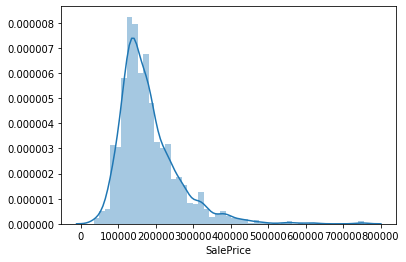

In [10]:
sns.distplot(train['SalePrice'])

Some statistical observations to make from this plot; 
- deviation from the normal distribution
- positive skew
- peakedness

In [14]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurtosis())

Skewness: 1.882876
Kurtosis: 6.536282


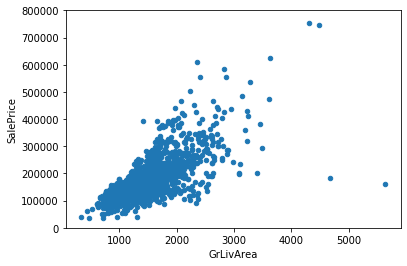

In [15]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

For the most part, there appears to be a linear relationship between GrLivArea - with a couple of outliers on the far right side (we'll deal with this later down the road). 

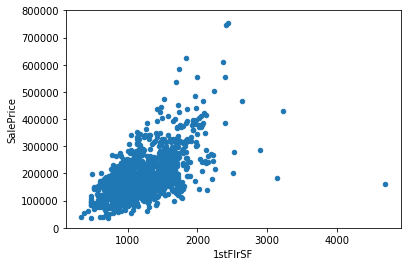

In [17]:
var = '1stFlrSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Just as with 'GrLivArea', there is a relatively linear relationship between 'SalePrice' and '1stFlrSF' while also having a bit of an outlier on the far right side. 

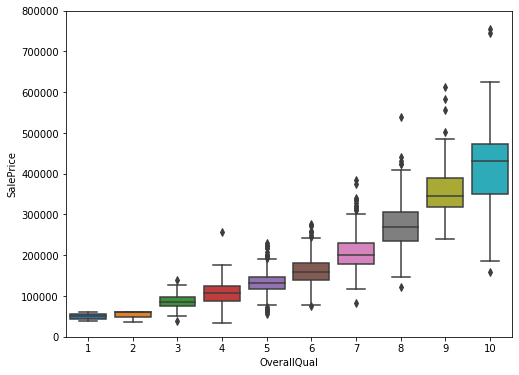

In [22]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

A clear depiction of 'SalePrice' being jacked up, the higher the 'OverallQual' is. 

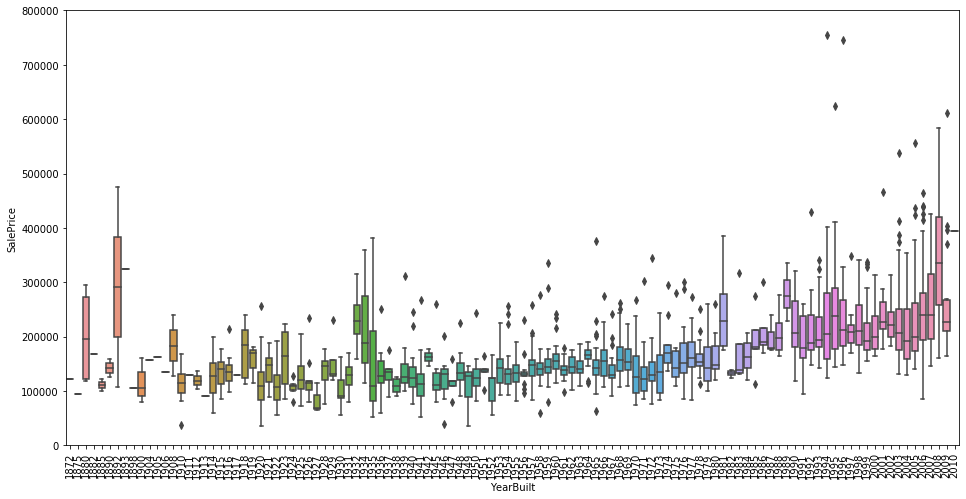

In [26]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Not as clear of a relationship, but there is a slight upward trending of 'YearBuilt' towards 'SalePrice'. ie, the newer the house, the more expensive it'll be. 

This initial look at the features identified that;
- '1stFlrSF' and 'GrLivArea' have strong linear relationships with 'SalePrice'. 
- 'OverallQual' seems to have a strong correlated relationship
- 'YearBuilt' is a bit more difficult to identify as trending positive/negative with 'SalePrice' and remains ambiguous.

This was a brief exploration into 4 key features that stood out as a initial predictors of 'SalePrice'. This proves that we are on the right track in terms of grasping the gist of the housing market (feature selection). In the next chapter, we'll be digging into the complex relationships that 'SalePrice' has with the other ~80 features (feature engineering).

## 3. Multivariate Study

The above has all been subjective in nature to help us determine 'SalePrice'. However, we must kick subjectivity to the curb when we want to try our best to predict housing prices and be more methodical in selecting features. 

The best snapshot we can take at features and 'SalePrice' will be the following; 
- Correlation matrix (heatmap)
- 'SalePrice' correlation matrix (zoomed heatmap)
- Scatter plots between correlated variables

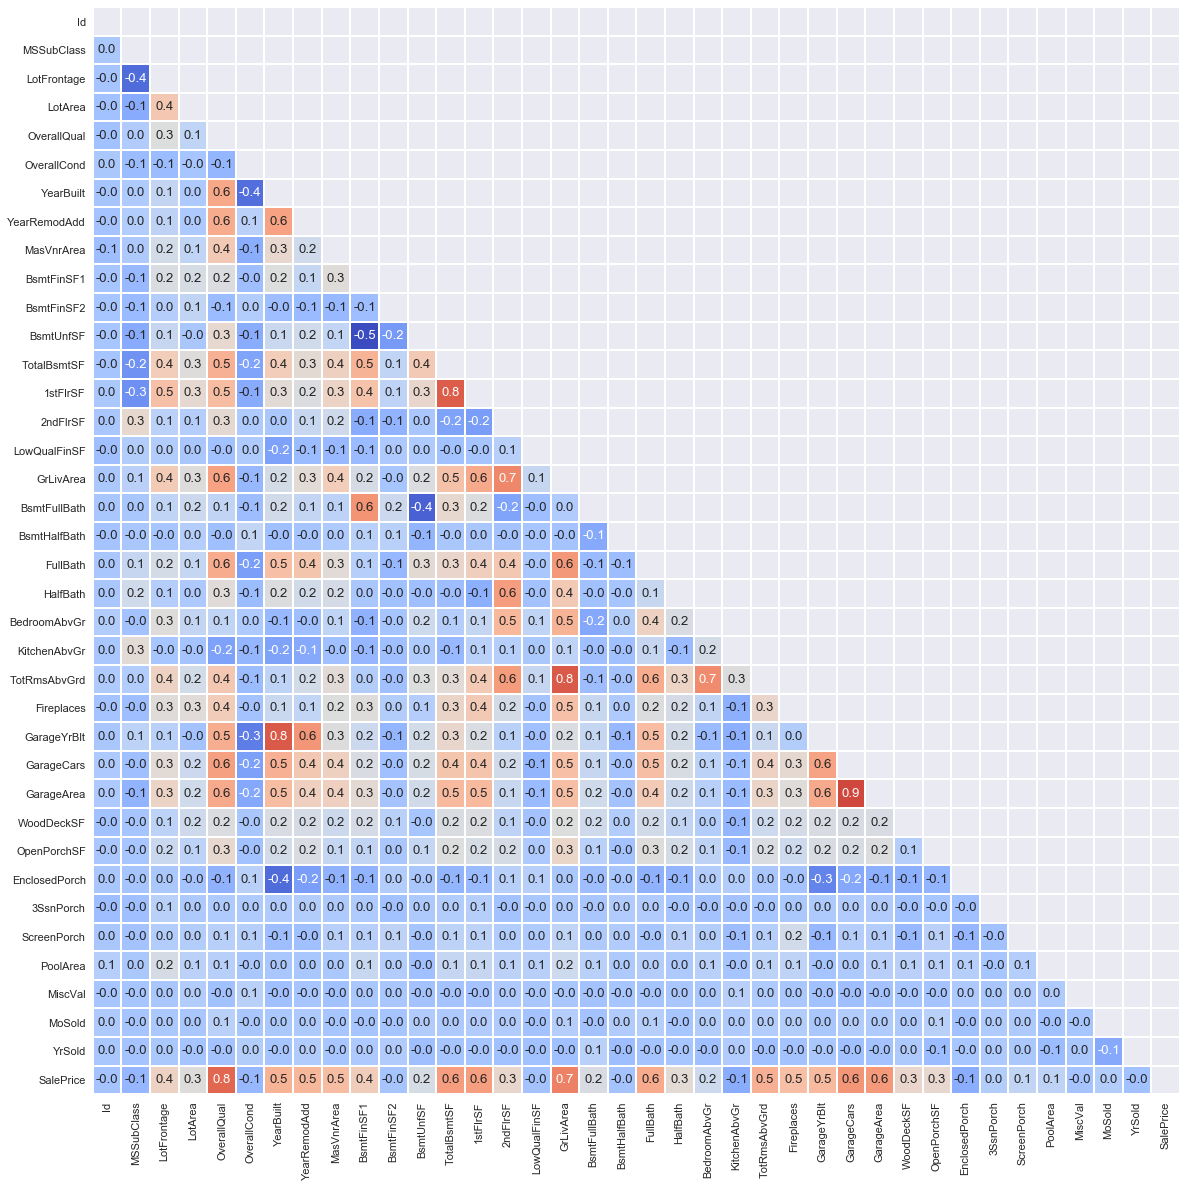

In [28]:
sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

This half pyramid shares with us a *lot* of information with the numerical features against a.) each other and most importantly b.) 'SalePrice'. 

Some of the dark blue / red tiles in the grid will indicate strong correlations (negatively and positively correlated respectively). It is important to note that some of the strong readings may be due to colinearity, meaning that two features essentially explain the same information. Here are some match ups that particularly stand out. 
- 'GarageArea', 'GarageCars': the more cars you can fit in your garage, the larger your garage
- 'GarageYrBuilt,' 'YearBuilt': houses and garages are typically built together
- 'GrLivArea', 'TotRmsAbvGrd': may be colinear in nature

Although this information will be valuable to us further down the path, the major row to highlight here is the bottom row. This is what we were after from the very beginning. This large matrix makes it rather hard to analyze the most important parts, so we'll zoom in on what we're interested in.  

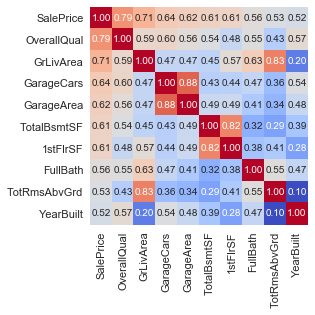

In [29]:
k = 10 #number of variables for heatmap
cols = correlation_train.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm,
                 annot=True,
                 cbar=False,
                 square=True,
                 cmap='coolwarm',
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols.values,
                 xticklabels=cols.values)

Walking through some of these findings, it shouldn't surprise us to find many of the predicted features in this top 10 list. What also shouldn't be a surprise is that some of the features commented on from the larger matrix also falls into this list. We can remove of each pairing so we don't get a double influenced correlation when predicting our 'SalePrice'. 

The next step into the multivariate exploration in the scatterplot. Here, we'll plug in the filtered features to zero in on some of the strongest predicting factors of 'SalePrice'. 

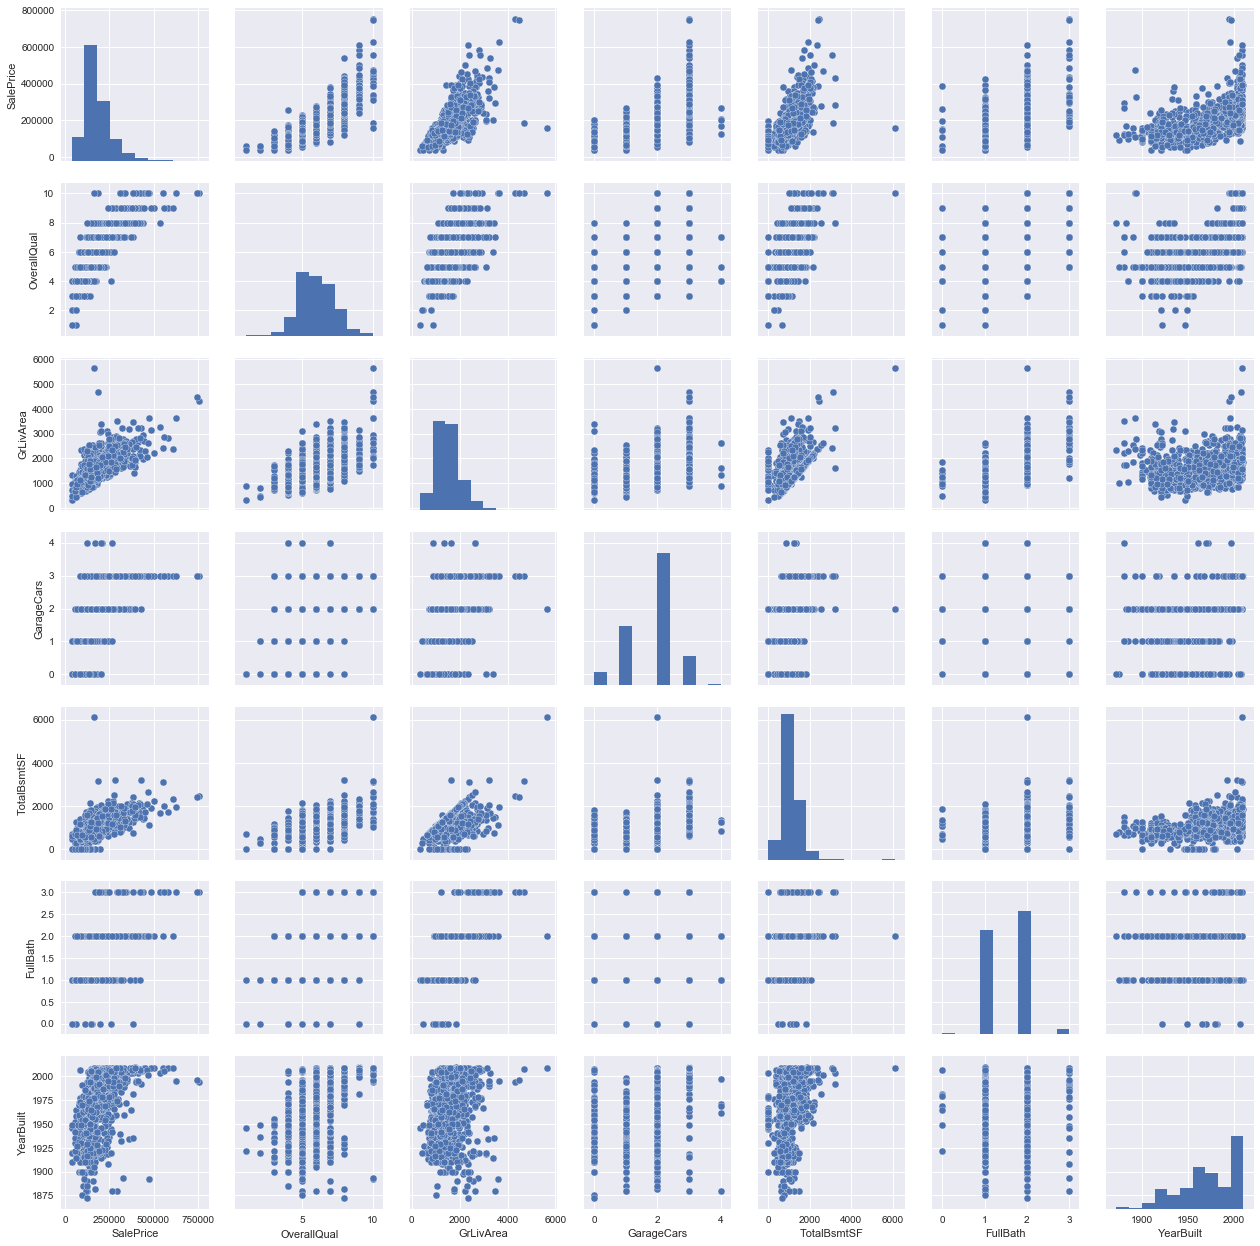

In [30]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols]);

Many of these relationships are already known and previously explored above. The purpose of this graph matrix is to uncover findings that weren't so obvious. For instance, the graph displaying 'TotalBsmtSF' and 'GrLivArea' appears to have a diagonal line - which intuitively makes sense since basements don't typically expand beyond the square footage of the level above. Another example would be the 'SalePrice' and 'GrLivArea' graph showing a similar diagonal line which would explain customers not willing to spend that dollar value for the amount of square footage they'll be receiving. (This may be an interesting analysis to run on a separate project.) 

## 4. Missing Data

With any dataset, it is good practice to always check for missing values. They can greatly throw off some of your results and weigh your decision in misguided directions. It is one thing to identify the missing data, but it is another thing to determine what to do with the missing data. Do you replace the data? Do you drop? Investigating the features more in depth will let us know the appropriate approach to these scenarios. 

In [32]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let's refocus up the question at hand: how can we predict house prices? Some of the things that pop into our minds should already be classified as important features while items on this list don't quite meet that criteria. It is common convention that if more than 20% of the data is missing... would it hold much weight in the overall analysis? Deleted. 

Features such as Pool Quality and Fireplace Quality seem rather trivial in the overall scheme of buying a house. Deleted. 

There seem to be 81 missing points for many of the Garage features. Since 'GarageCars' is already a strong predictor of 'SalePrice', it would seem redundent to replace all of the missing garage features. Deleted. 

As with the garage features, there is a strong Basement feature that can influence 'SalePrice' already. Replacement strategy of missing basement features? Deleted. 

MasVnrArea and MasVnrType hold little practical aspects of buying a house. They also have strong correlation with 'YearBuilt', meaning they are colinear in nature when predicting price. Deleted. 

All that leaves us with is 'Electrical'. This may have just been an error and only one data point is missing. Deleted. 

In [33]:
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

### Outliers 

When trying to figure out major insights on the data - an outlier can skew this data to depict a story that's untrue to the true narrative. 


#### Univariate Analysis

In order to begin comparing values to a distributive norm for an individual feature, 'SalePrice' in this case, we'll need to standardize its value. Standardizing refers to having a mean of 0 and a standard deviation of 1. 

In [47]:
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
mean_range = np.mean(saleprice_scaled) 
std_range = np.std(saleprice_scaled)
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)
print('\nmean of the distribution:')
print(mean_range)
print('\nstandard deviation of the distribution:')
print(std_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]

mean of the distribution:
3.896053383194518e-17

standard deviation of the distribution:
1.0


'SalePrice' has been standardized with a mean that is approaching 0 with a standard deviation of 1.0. There are the two 7-something values that appear to be on the high end of the scale. We will keep a tab here to investigate if this is a true outlier or not. 

#### Bivariate Analysis 

These graphs have been shown throughout this notebook numerous of times. With the newly aligned focus of finding outliers, we'll be approaching these bivariate graphs with the intent of dealing with these outliers. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


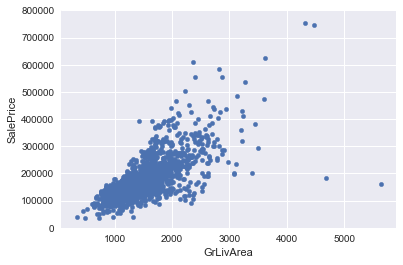

In [49]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

The two entries in question: the large GrLivArea with low 'SalePrice'. One may speculate that this could be agricultural land but there is no telling from the description of the data provided. Since these two points are hard to explain and fall of the bivariate trend, DELETED. 

Furthermore, the two 7-something values in our standardization scaling analysis raised some eyebrows initially, but after looking at this graph, they seem to fall in line with the rest of the data's trend. We will keep these two inputs. 

In [51]:
train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [53]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


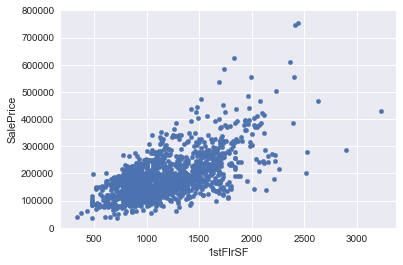

In [55]:
var = '1stFlrSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Everything here looks relatively in line here. Nothing to see. Move it along. 

### 5. Testing Assumptions

The only way to begin predicting data from our dataset is if we have some sort of predictable aspect of the data - is this a circle argument? 

In order to make any sort of assumptions, there needs to be assumptions _about_ the data first, according to Hair et al. (2013): Normality, homoscedasticity, linearity and absence of correlated errors. 

- *Normality* - data needs to be normally distributed. This is important because many statistical tests rely on this assumption (eg. t-statistics). 

- *Homoscedasticity* - describes a situation which the errors between a relationship of dependent variables and all other independent variables are the same across all values. 

- *Linearity* - most common way to assess this is through scatterplots to search for linear patterns. Luckily for us, most of the scatter plots appear to be linear in nature. 

- *Absence of correlated errors* - Within our feature engineering step, we paid attention to the colinearity of certain features and removed them from swaying too much weight from one (seemingly) variable. 


#### Normality 
Nothing new here. We briefly explored the distribution of 'SalePrice' and already determined it is not normally distributed. 

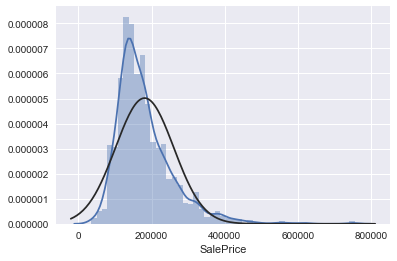

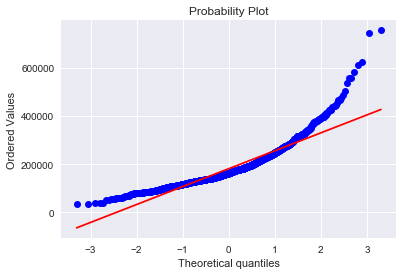

In [57]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

There is a positive skew and does not align with the red diagonal line (that helps us gauge normality). 

A simple log transformation will allow the distribution to align well with the diagonal red. 

In [58]:
train['SalePrice'] = np.log(train['SalePrice'])

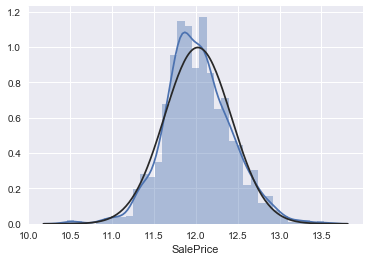

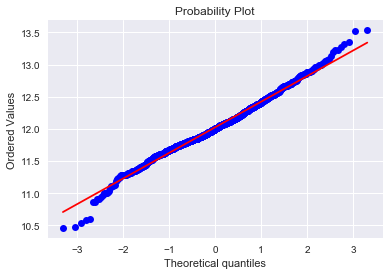

In [59]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

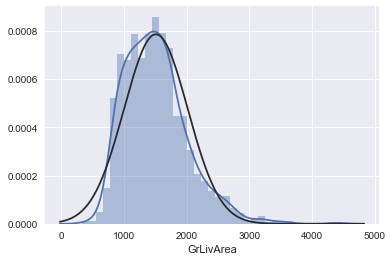

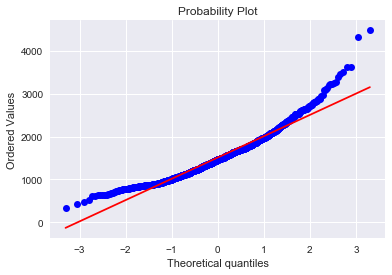

In [60]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [61]:
train['GrLivArea'] = np.log(train['GrLivArea'])

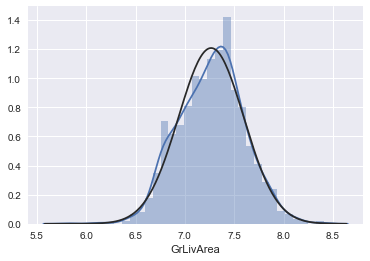

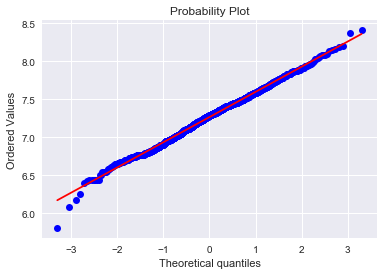

In [62]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)